## imports e downloads

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 4.2 MB/s 
     |████████████████████████████████| 163 kB 53.3 MB/s 
     |████████████████████████████████| 212 kB 61.1 MB/s 
     |████████████████████████████████| 115 kB 56.2 MB/s 
     |████████████████████████████████| 127 kB 58.6 MB/s 
     |████████████████████████████████| 115 kB 46.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import torch
from torchvision import transforms as t
import torchaudio
import pandas as pd
import numpy as np
import os
from google.colab import drive
from torch.utils.data import Dataset
#drive.mount('/gdrive', force_remount=True)
from datasets import load_dataset


import librosa
import librosa.display
import matplotlib.pyplot as plt



In [ ]:
#annotations = '/gdrive/MyDrive/sinais/metadata.csv'
# '/content/drive/MyDrive/sinais' rodrigo
#'/gdrive/MyDrive/sinais'    principe
audios_train = '/content/drive/MyDrive/sinais'
torch.manual_seed(123)

In [ ]:
full_dataset = load_dataset("audiofolder",data_dir = audios_train) # Função semelhante a ImageFolder -> seta o label de acordo com o diretorio

train_dataset = full_dataset["train"]


In [ ]:

test_dataset = full_dataset["test"]

In [ ]:
#print(train_dataset["audio"][110],train_dataset["label"][110]) # label = {0,11,12,13,14,15,16,17,18,19}

## teste de diferenca

In [ ]:
def my_collate(batch):
    data = [item["audio"] for item in batch]
    target= [item["label"] for item in batch]
    return data, target

#### analisando os labels

In [ ]:
for audo in train_dataset:

    print(audo['label'])
    break

0


In [ ]:
labels_train = np.array([audo['label'] for audo in train_dataset])


In [ ]:
np.unique(labels_train,return_counts=True)

NameError: ignored

In [ ]:
labels_test = np.array([audo['label'] for audo in test_dataset])


In [ ]:
np.unique(labels_test,return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([28, 36, 35, 25, 27, 22, 23, 18, 30, 20]))

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

plt.rcParams['figure.figsize'] = [14, 7]

In [ ]:
plt.title("N° audios de cada pessoa")
plt.bar(
        np.array([ 0, 11, 12, 13, 14, 15, 16, 17, 18, 19])%10,
        np.array([65, 82, 85, 60, 63, 50, 53, 44, 69, 45]),label = 'train'
        )
plt.bar(
        np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]) - 1,
        np.array([28, 36, 35, 25, 27, 22, 23, 18, 30, 20]),
        label = "test"
        )
plt.legend()
plt.show()

## continuacao

In [ ]:
len(train_dataset)

616

In [ ]:
#train_dataset_np = train_dataset.with_format(type = "numpy")
#print("Tipos : {}".format(type(train_dataset_np)))

#dataloader_train = torch.utils.data.DataLoader(train_dataset, batch_size = len(train_dataset), shuffle = True,collate_fn = my_collate)
#dataloader_test = torch.utils.data.DataLoader(test_dataset, batch_size = len(test_dataset), shuffle = True,collate_fn = my_collate)


apenas um sampling_rate

In [ ]:
sampling_dict = {}
for data in train_dataset:
    sampling_dict[data['audio']['sampling_rate']] = True

for data in test_dataset:
    sampling_dict[data['audio']['sampling_rate']] = True

print(sampling_dict)

{16000: True}


# transform dataset

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt



### spec

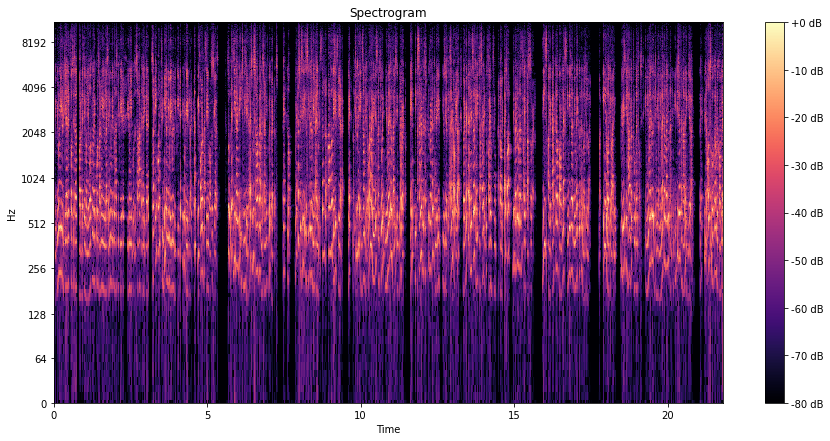

In [ ]:
y = train_dataset[34]['audio']['array']
spec = np.abs(librosa.stft(y, hop_length= 2**10))
spec = librosa.amplitude_to_db(spec, ref=np.max)

plt.figure(figsize = (15,7))
librosa.display.specshow(spec,  x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

## test example

### ex1

In [ ]:
train_dataset[34]['label']

0

(960512,)


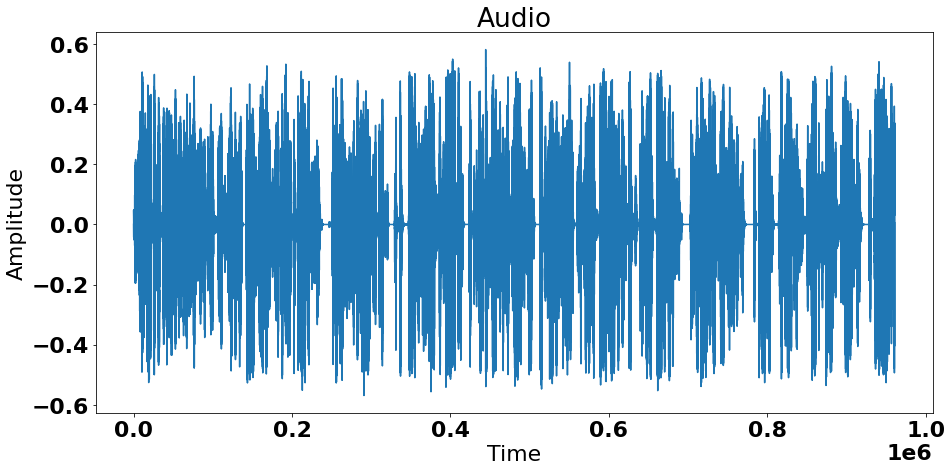

In [ ]:
y = train_dataset[34]['audio']['array']

plt.figure(figsize = (15,7))
plt.plot(y)
plt.title('Audio');
plt.xlabel('Time');
plt.ylabel('Amplitude');

print(y.shape)

[[0.06979822]
 [0.04061086]
 [0.00453758]
 ...
 [0.03972463]
 [0.03036109]
 [0.01934974]]


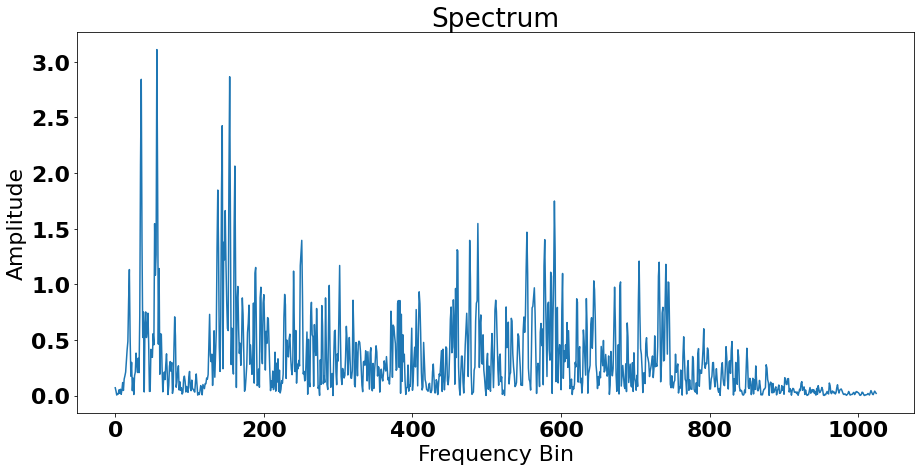

In [ ]:
n_fft = int(2**20)
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))

plt.figure(figsize = (15,7))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

print(ft)

In [ ]:
spec = np.abs(librosa.stft(y, hop_length= 2**10))
spec = librosa.amplitude_to_db(spec, ref=np.max)

plt.figure(figsize = (15,7))
librosa.display.specshow(spec,  x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

In [ ]:
print(y.shape,spec.shape)

In [ ]:
print(np.log2(960512))
print(2**15)
print(960512)

### ex2

In [ ]:
train_dataset[30]['label']

0

In [ ]:
y = train_dataset[30]['audio']['array']

y = y[:3*16_000]
plt.figure(figsize = (15,7))
plt.plot(y)
plt.title('Audio');
plt.xlabel('Time');
plt.ylabel('Amplitude');

print(y.shape)

(48000,)


https://librosa.org/doc/latest/generated/librosa.stft.html

[[1.2245064 ]
 [0.24466085]
 [0.7414871 ]
 ...
 [0.00524947]
 [0.00886112]
 [0.0124996 ]]


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=512
  n_fft, y.shape[-1]


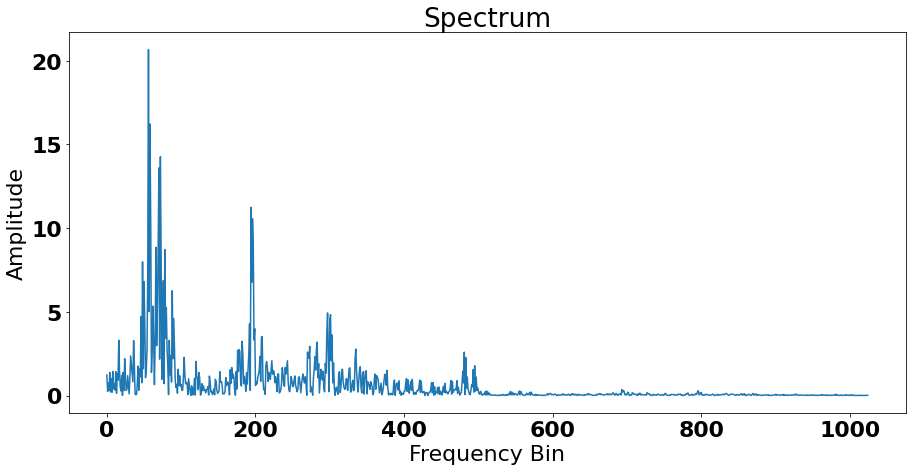

In [ ]:
n_fft = int(2**9)
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))

plt.figure(figsize = (15,7))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

print(ft)

In [ ]:
spec = np.abs(librosa.stft(y, hop_length= 2**7, n_fft= 2**9,))
spec = librosa.amplitude_to_db(spec, ref=np.max)

plt.figure(figsize = (15,7))
librosa.display.specshow(spec,  x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

In [ ]:
print(y.shape,spec.shape)

## quebrar audio em partes

### pausas de respiracao

In [ ]:

y = train_dataset[34]['audio']['array']
np.abs(y).max(),np.abs(y).min()

(0.5823364, 0.0)

In [ ]:
y = train_dataset[34]['audio']['array']

#y = y[:100_000]



threshold = np.abs(y).max()/10
print("limiar:",threshold)

#y = y*(np.abs(y) > threshold)

plt.figure(figsize = (15,7))

# plot original
plt.plot(y)
plt.title('Audio original');
plt.xlabel('Time');
plt.ylabel('Amplitude');

print("shape original:",y.shape)

# plot sections

N = len(y)
plt.plot([0,N],2*[threshold])

# voiceless = np.where(np.abs(y) < threshold)
# print(voiceless)



# plt.plot(voiceless,len(voiceless)*[threshold],'o')

# plt.show()

count = 0
pause_flag = False
pausas = []
pausa = [0,0]

count = 0
t = 0
while t < len(y):

    amp = np.abs(y[t])
    if amp < threshold: 
        pausa[0] = t
    while amp < threshold and t < len(y)-1:
        count += 1
        t += 1
        amp = np.abs(y[t])

    if count > 5_000:
        pausa[1] = t
        pausas.append(pausa[:])
    
    count = 0
    t+=1


print("\n\n")
print(len(pausas))
print(pausas)
pausas = np.array(pausas)
medium_points = pausas.mean(axis = 1)

n_med = len(medium_points)
plt.plot(medium_points,n_med*[threshold],'o', color = 'red')
plt.show()

limiar: 0.058233642578125
shape original: (960512,)



13
[[100869, 106698], [136681, 141897], [235444, 250478], [320900, 329538], [339083, 347446], [415562, 423507], [505533, 512881], [582596, 588873], [655518, 660671], [689224, 703068], [769767, 783236], [807174, 814932], [917288, 928428]]


In [ ]:
def voiceless_intervals(y,threshold):
    
    count = 0
    pause_flag = False
    pausas = []
    pausa = [0,0]

    count = 0
    t = 0
    while t < len(y):

        amp = np.abs(y[t])
        if amp < threshold: 
            pausa[0] = t
        while amp < threshold and t < len(y)-1:
            count += 1
            t += 1
            amp = np.abs(y[t])

        if count > 5_000:
            pausa[1] = t
            pausas.append(pausa[:])
        
        count = 0
        t+=1
    
    return pausas


def seccionar(y,threshold):
    pausas = voiceless_intervals(y,threshold)
    
    seccoes = []
    three_sec = 3*16_000# 3 segundos
    
    if len(pausas)> 0:

        pausa_anterior = pausas[0]
        for pausa_atual in pausas[1:]:
            inicio_fala = pausa_anterior[1]
            fim_fala    = pausa_atual[0]

            tempo_fala = fim_fala - inicio_fala
            

            if tempo_fala > three_sec :

                for i in range(0,int(tempo_fala)//three_sec):
                    seccoes.append(y[inicio_fala + i*three_sec : inicio_fala + (i+1)*three_sec])
                
            pausa_anterior = pausa_atual[:]
        
        # da ultima pausa ate o fim do audio
        inicio_fala = pausa_anterior[1]
        fim_fala = len(y)

    else: # nao houve pausas no discurso
        inicio_fala = 0
        fim_fala = len(y)

    
    
    tempo_fala = inicio_fala - fim_fala
    for i in range(0,int(tempo_fala)//three_sec):
                seccoes.append(y[inicio_fala + i*three_sec : inicio_fala + (i+1)*three_sec])

    return seccoes



N° seccoes: 9
(48000,)
(48000,)
(48000,)
(48000,)
(48000,)


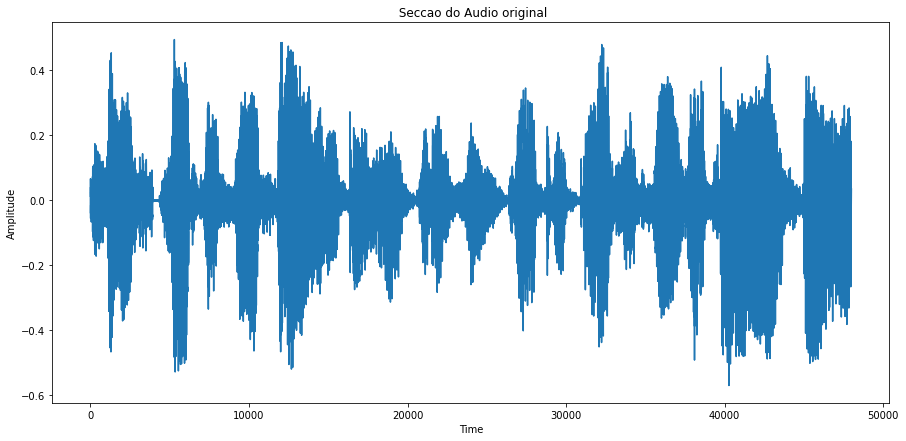

In [ ]:
y = train_dataset[34]['audio']['array']

seccoes = seccionar(y,5e-2)

print("N° seccoes:",len(seccoes))
for seccao in seccoes[:5]:
    
    print(seccao.shape)

    plt.figure(figsize = (15,7))

    # plot original
    plt.plot(seccao)
    plt.title(' Seccao do Audio original');
    plt.xlabel('Time');
    plt.ylabel('Amplitude');


https://librosa.org/doc/latest/generated/librosa.stft.html
n_fftint > 0 [scalar]
length of the windowed signal after padding with zeros. The number of rows in the STFT matrix D is (1 + n_fft/2). The default value, n_fft=2048 samples, corresponds to a physical duration of 93 milliseconds at a sample rate of 22050 Hz, i.e. the default sample rate in librosa. This value is well adapted for music signals. **However, in speech processing, the recommended value is 512,** corresponding to 23 milliseconds at a sample rate of 22050 Hz. In any case, we recommend setting n_fft to a power of two for optimizing the speed of the fast Fourier transform (FFT) algorithm.

N° seccoes: 9



(257, 376)
(257, 376)
(257, 376)
(257, 376)
(257, 376)


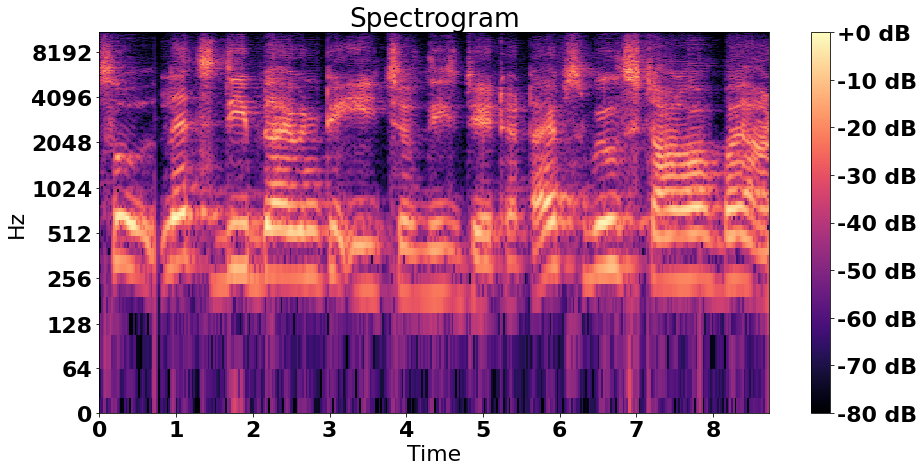

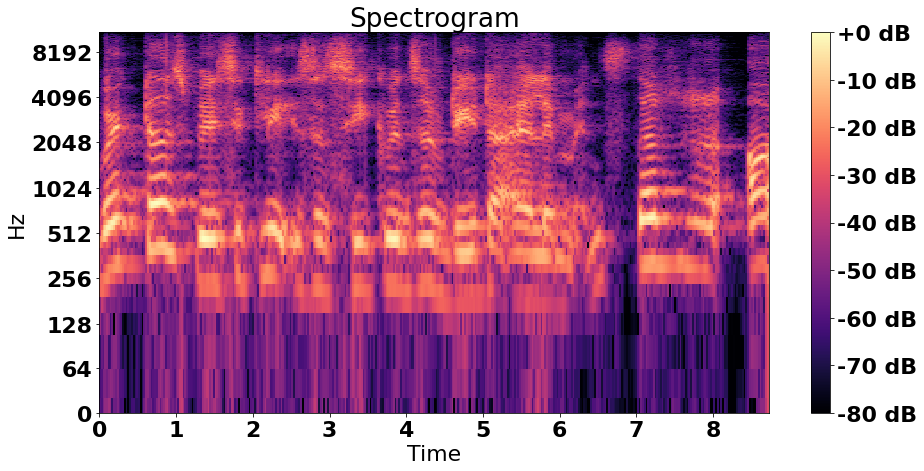

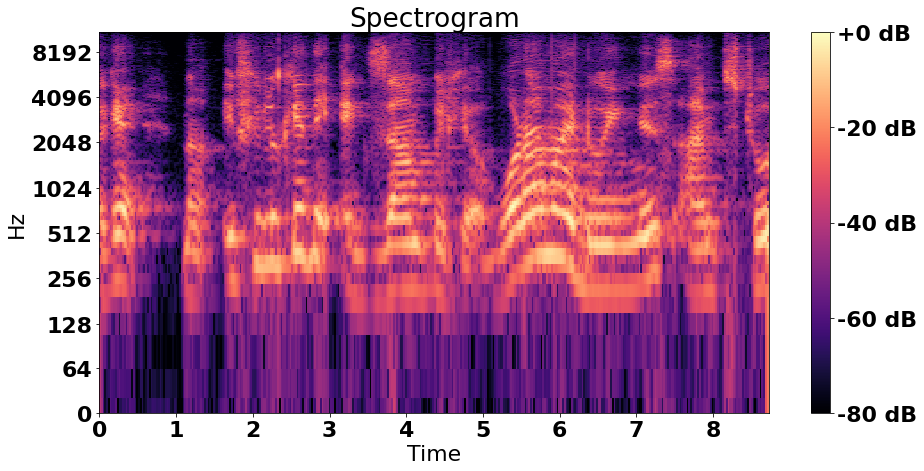

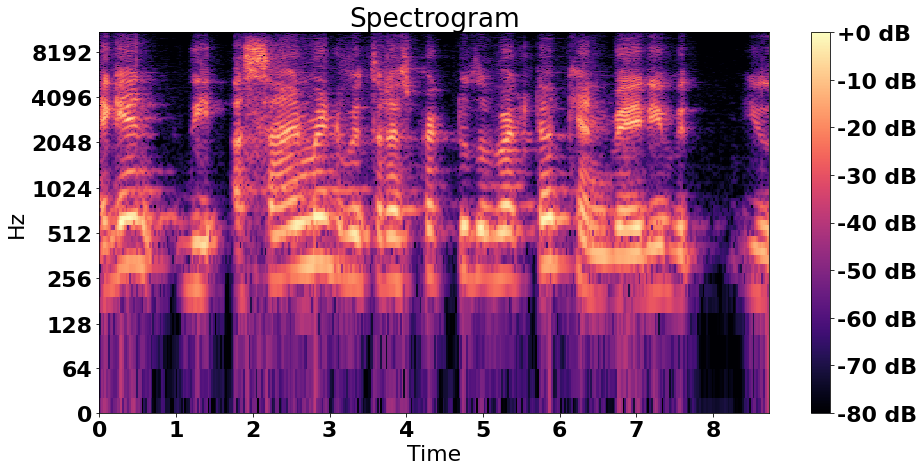

In [ ]:
y = train_dataset[34]['audio']['array']

seccoes = seccionar(y,5e-2)

print("N° seccoes:",len(seccoes))
print("\n\n")

for seccao in seccoes[:5]:

    spec = np.abs(librosa.stft(seccao, n_fft= 512))#, hop_length= 2**6))
    spec = librosa.amplitude_to_db(spec, ref=np.max)

    print(spec.shape)

    plt.figure(figsize = (15,7))
    librosa.display.specshow(spec,  x_axis='time', y_axis='log');
    plt.colorbar(format='%+2.0f dB');
    plt.title('Spectrogram');

#### salvar dados

#### save train set

In [ ]:
novo_img_trainset = []
novo_labels = []
for numero,audio in enumerate(train_dataset):
    
    y = audio['audio']['array']
    label = audio['label']
    
    threshold = np.abs(y).max()/10

    seccoes = seccionar(y,threshold)

    print("audio numero:",numero ," |  N° seccoes:",len(seccoes))
#    print("\n\n")
    for seccao in seccoes:
        
        spec = np.abs(librosa.stft(seccao, n_fft= 512))#, hop_length= 2**6))
        spec = librosa.amplitude_to_db(spec, ref=np.max)
        novo_img_trainset.append(spec)
        novo_labels.append(label)
        

audio numero: 0  |  N° seccoes: 8
audio numero: 1  |  N° seccoes: 8
audio numero: 2  |  N° seccoes: 10
audio numero: 3  |  N° seccoes: 8
audio numero: 4  |  N° seccoes: 7
audio numero: 5  |  N° seccoes: 7
audio numero: 6  |  N° seccoes: 7
audio numero: 7  |  N° seccoes: 9
audio numero: 8  |  N° seccoes: 8
audio numero: 9  |  N° seccoes: 6
audio numero: 10  |  N° seccoes: 11
audio numero: 11  |  N° seccoes: 5
audio numero: 12  |  N° seccoes: 7
audio numero: 13  |  N° seccoes: 7
audio numero: 14  |  N° seccoes: 9
audio numero: 15  |  N° seccoes: 7
audio numero: 16  |  N° seccoes: 8
audio numero: 17  |  N° seccoes: 8
audio numero: 18  |  N° seccoes: 7
audio numero: 19  |  N° seccoes: 5
audio numero: 20  |  N° seccoes: 10
audio numero: 21  |  N° seccoes: 9
audio numero: 22  |  N° seccoes: 5
audio numero: 23  |  N° seccoes: 8
audio numero: 24  |  N° seccoes: 2
audio numero: 25  |  N° seccoes: 6
audio numero: 26  |  N° seccoes: 8
audio numero: 27  |  N° seccoes: 9
audio numero: 28  |  N° sec

In [ ]:
np.unique(novo_labels,return_counts = True)

(array([ 0, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([416, 665, 414, 340, 463, 193, 161, 351, 345, 296]))

In [ ]:
novo_img_trainset = np.array(novo_img_trainset)
novo_img_trainset.shape

(3644, 257, 376)

In [ ]:
novo_labels = np.array(novo_labels)
novo_labels = novo_labels%10

In [ ]:
novo_labels.shape

(3644,)

In [ ]:
np.save("/content/drive/MyDrive/synestheticAI/pause_breath_set/train_images",novo_img_trainset)
np.save("/content/drive/MyDrive/synestheticAI/pause_breath_set/train_labels",novo_labels)

#### save teste set 

In [ ]:
novo_img_testset = []
novo_labels = []
for numero,audio in enumerate(test_dataset):
    
    y = audio['audio']['array']
    label = audio['label']
    
    threshold = np.abs(y).max()/10

    seccoes = seccionar(y,threshold)

    print("audio numero:",numero ," |  N° seccoes:",len(seccoes))
#    print("\n\n")
    for seccao in seccoes:
        
        spec = np.abs(librosa.stft(seccao, n_fft= 512))#, hop_length= 2**6))
        spec = librosa.amplitude_to_db(spec, ref=np.max)
        novo_img_testset.append(spec)
        novo_labels.append(label)
        

audio numero: 0  |  N° seccoes: 5
audio numero: 1  |  N° seccoes: 11
audio numero: 2  |  N° seccoes: 8
audio numero: 3  |  N° seccoes: 5
audio numero: 4  |  N° seccoes: 0
audio numero: 5  |  N° seccoes: 5
audio numero: 6  |  N° seccoes: 1
audio numero: 7  |  N° seccoes: 5
audio numero: 8  |  N° seccoes: 8
audio numero: 9  |  N° seccoes: 8
audio numero: 10  |  N° seccoes: 1
audio numero: 11  |  N° seccoes: 6
audio numero: 12  |  N° seccoes: 7
audio numero: 13  |  N° seccoes: 3
audio numero: 14  |  N° seccoes: 4
audio numero: 15  |  N° seccoes: 8
audio numero: 16  |  N° seccoes: 5
audio numero: 17  |  N° seccoes: 10
audio numero: 18  |  N° seccoes: 4
audio numero: 19  |  N° seccoes: 3
audio numero: 20  |  N° seccoes: 6
audio numero: 21  |  N° seccoes: 5
audio numero: 22  |  N° seccoes: 4
audio numero: 23  |  N° seccoes: 8
audio numero: 24  |  N° seccoes: 3
audio numero: 25  |  N° seccoes: 7
audio numero: 26  |  N° seccoes: 6
audio numero: 27  |  N° seccoes: 9
audio numero: 28  |  N° secc

In [ ]:
np.unique(novo_labels,return_counts = True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([155, 229,  99, 154, 154,  30,  56, 107,  94, 112]))

In [ ]:
novo_img_testset = np.array(novo_img_testset)
novo_img_testset.shape

(1190, 257, 376)

In [ ]:
novo_labels = np.array(novo_labels)
novo_labels = novo_labels-1

In [ ]:
novo_labels.shape

(1190,)

In [ ]:
np.save("/content/drive/MyDrive/synestheticAI/pause_breath_set/test_images",novo_img_testset)
np.save("/content/drive/MyDrive/synestheticAI/pause_breath_set/test_labels",novo_labels)

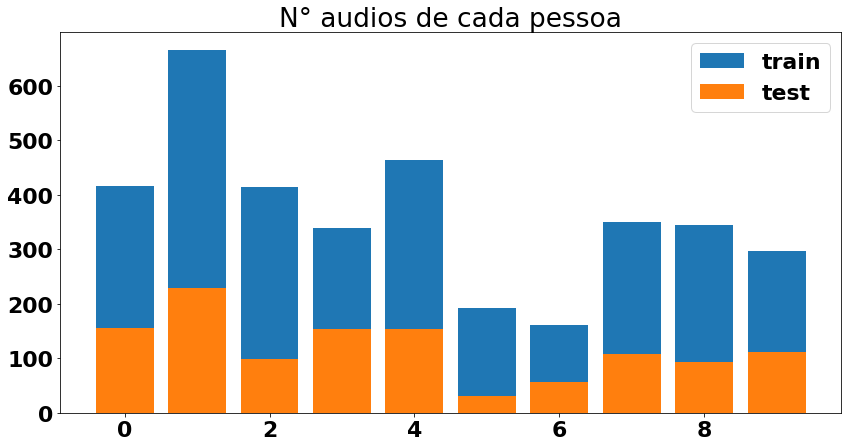

In [ ]:
plt.title("N° audios de cada pessoa")
plt.bar(
        np.array([ 0, 11, 12, 13, 14, 15, 16, 17, 18, 19])%10,
        np.array([416, 665, 414, 340, 463, 193, 161, 351, 345, 296]),label = 'train'
        )
plt.bar(
        np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]) - 1,
        np.array([155, 229,  99, 154, 154,  30,  56, 107,  94, 112]),
        label = "test"
        )
plt.legend()
plt.show()

### cortes iguais

In [ ]:
n_audios_pessoa = { 0 : 0,
                    11: 0,
                    12: 0,
                    13: 0,
                    14: 0,
                    15: 0,
                    16: 0,
                    17: 0,
                    18: 0,
                    19: 0   
                   } 


In [ ]:
novo_img_trainset = []
novos_labels = []
tempo_audio = 3*16_000

for numero,audio in enumerate(train_dataset):
    y = audio["audio"]["array"]
    label = audio["label"]

    
    if n_audios_pessoa[label] >= 500:
        continue

    print("audio numero:",numero ," |  N° seccoes:",len(y)/tempo_audio)

    for section in range(0, len(y) , tempo_audio):
        if section + tempo_audio >= len(y):
            break

        seccao = y[section:section + tempo_audio] 
        
        spec = np.abs(librosa.stft(seccao, n_fft= 512))#, hop_length= 2**6))
        spec = librosa.amplitude_to_db(spec, ref=np.max)
        
        novo_img_trainset.append(spec)
        novos_labels.append(label)

        n_audios_pessoa[label] += 1
        if n_audios_pessoa[label] >= 500:
            break



audio numero: 0  |  N° seccoes: 20.010666666666665
audio numero: 1  |  N° seccoes: 20.010666666666665
audio numero: 2  |  N° seccoes: 20.010666666666665
audio numero: 3  |  N° seccoes: 19.968
audio numero: 4  |  N° seccoes: 20.010666666666665
audio numero: 5  |  N° seccoes: 20.010666666666665
audio numero: 6  |  N° seccoes: 20.010666666666665
audio numero: 7  |  N° seccoes: 19.968
audio numero: 8  |  N° seccoes: 20.010666666666665
audio numero: 9  |  N° seccoes: 20.010666666666665
audio numero: 10  |  N° seccoes: 20.010666666666665
audio numero: 11  |  N° seccoes: 19.968
audio numero: 12  |  N° seccoes: 20.010666666666665
audio numero: 13  |  N° seccoes: 20.010666666666665
audio numero: 14  |  N° seccoes: 20.010666666666665
audio numero: 15  |  N° seccoes: 19.968
audio numero: 16  |  N° seccoes: 20.010666666666665
audio numero: 17  |  N° seccoes: 20.010666666666665
audio numero: 18  |  N° seccoes: 20.010666666666665
audio numero: 19  |  N° seccoes: 19.968
audio numero: 20  |  N° seccoe

In [ ]:
np.unique(novos_labels,return_counts = 1)

(array([ 0, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))

In [ ]:
np.unique([spec.shape[0] for spec in novo_img_trainset],return_counts = 1)

(array([257]), array([5000]))

In [ ]:
del train_dataset

In [ ]:
type(novo_img_trainset[0])

numpy.ndarray

In [ ]:
novo_img_trainset = np.array(novo_img_trainset)

In [ ]:
novos_labels = np.array(novos_labels)%10

In [ ]:
np.save("/content/drive/MyDrive/synestheticAI/uniform_div_set/train_images",novo_img_trainset)
np.save("/content/drive/MyDrive/synestheticAI/uniform_div_set/train_labels",novos_labels)

In [ ]:
del novo_img_trainset

In [ ]:
n_audios_pessoa = { 1: 0,
                    2: 0,
                    3: 0,
                    4: 0,
                    5: 0,
                    6: 0,
                    7: 0,
                    8: 0,
                    9: 0,
                   10: 0   
                   } 


In [ ]:
novo_img_testset = []
novos_labels = []
tempo_audio = 3*16_000

for numero,audio in enumerate(test_dataset):
    y = audio["audio"]["array"]
    label = audio["label"]

    
    if n_audios_pessoa[label] >= 10000:
        continue

    print("audio numero:",numero ," |  N° seccoes:",len(y)/tempo_audio)

    for section in range(0, len(y) , tempo_audio):
        if section + tempo_audio >= len(y):
            break

        seccao = y[section:section + tempo_audio] 
        
        spec = np.abs(librosa.stft(seccao, n_fft= 512))#, hop_length= 2**6))
        spec = librosa.amplitude_to_db(spec, ref=np.max)
        
        novo_img_testset.append(spec)
        novos_labels.append(label)

        n_audios_pessoa[label] += 1
        if n_audios_pessoa[label] >= 500000:
            break



audio numero: 0  |  N° seccoes: 20.010666666666665
audio numero: 1  |  N° seccoes: 20.010666666666665
audio numero: 2  |  N° seccoes: 19.968
audio numero: 3  |  N° seccoes: 20.010666666666665
audio numero: 4  |  N° seccoes: 20.010666666666665
audio numero: 5  |  N° seccoes: 20.010666666666665
audio numero: 6  |  N° seccoes: 19.968
audio numero: 7  |  N° seccoes: 20.010666666666665
audio numero: 8  |  N° seccoes: 20.010666666666665
audio numero: 9  |  N° seccoes: 20.010666666666665
audio numero: 10  |  N° seccoes: 19.968
audio numero: 11  |  N° seccoes: 20.010666666666665
audio numero: 12  |  N° seccoes: 20.010666666666665
audio numero: 13  |  N° seccoes: 20.010666666666665
audio numero: 14  |  N° seccoes: 19.968
audio numero: 15  |  N° seccoes: 20.010666666666665
audio numero: 16  |  N° seccoes: 20.010666666666665
audio numero: 17  |  N° seccoes: 20.010666666666665
audio numero: 18  |  N° seccoes: 19.968
audio numero: 19  |  N° seccoes: 20.010666666666665
audio numero: 20  |  N° seccoe

In [ ]:
n_audios_pessoa

{1: 552,
 2: 707,
 3: 672,
 4: 474,
 5: 518,
 6: 425,
 7: 442,
 8: 350,
 9: 589,
 10: 376}

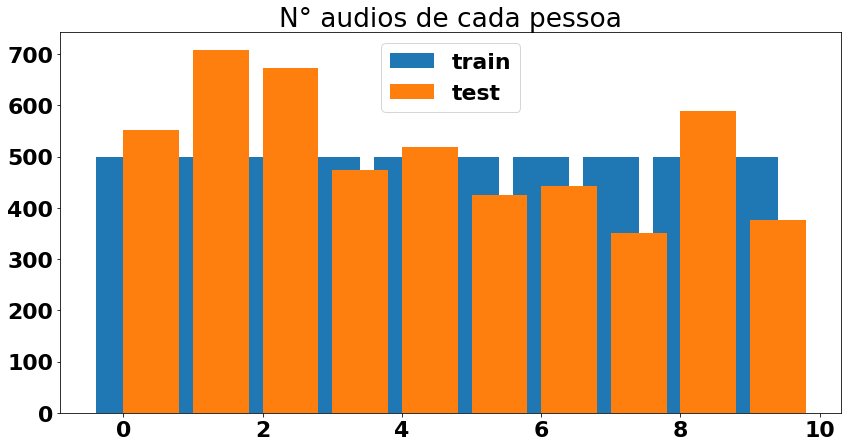

In [ ]:
plt.title("N° audios de cada pessoa")
plt.bar(
        np.array([ 0, 11, 12, 13, 14, 15, 16, 17, 18, 19])%10,
        np.array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500]),label = 'train'
        )
plt.bar(
        np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]) - 1,
        np.array([552,707,672,474,518,425,442,350,589, 376]),
        label = "test",align = 'edge'
        )


plt.legend()
plt.show()

In [ ]:
del test_dataset

In [ ]:
del full_dataset

In [ ]:
novo_img_testset = np.array(novo_img_testset)

In [ ]:
np.save("/content/drive/MyDrive/synestheticAI/pause_breath_set/test_images",novo_img_testset)


In [ ]:
novos_labels = np.array(novos_labels) - 1

In [ ]:
np.save("/content/drive/MyDrive/synestheticAI/pause_breath_set/test_labels",novos_labels)

# save dataset

In [ ]:
img_spec_set = []
labels = []
sizes = []

In [ ]:
for data in train_dataset:
    sizes.append(data['audio']['array'].shape)

for data in test_dataset:
    sizes.append(data['audio']['array'].shape)


In [ ]:
np.unique(sizes,return_counts = True)

(array([ 17949,  37050,  94366, 245208, 364846, 487053, 672664, 795711,
        810822, 944193, 958464, 960512]),
 array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1, 214, 656]))

In [ ]:
y.shape

(32768,)

In [ ]:
img_spec_set = []
labels = []

for data in train_dataset:
    y = data['audio']['array']
    label = data['label']

    if len(y) < 958464: continue
    
        
    y = y[:2**15]

    spec = np.abs(librosa.stft(y, hop_length= 2**7, n_fft= 2**9,))
    spec = librosa.amplitude_to_db(spec, ref=np.max)

    img_spec_set.append(spec)
    labels.append(label)

img_spec_set = np.array(img_spec_set)
labels       = np.array(labels)


In [ ]:
np.unique(labels%10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.save("/content/drive/MyDrive/synestheticAI/mel_spec_dataset/train_images",
        img_spec_set)
np.save("/content/drive/MyDrive/synestheticAI/mel_spec_dataset/train_labels",
        labels%10)

In [ ]:
img_spec_set[0].shape

(257, 257)

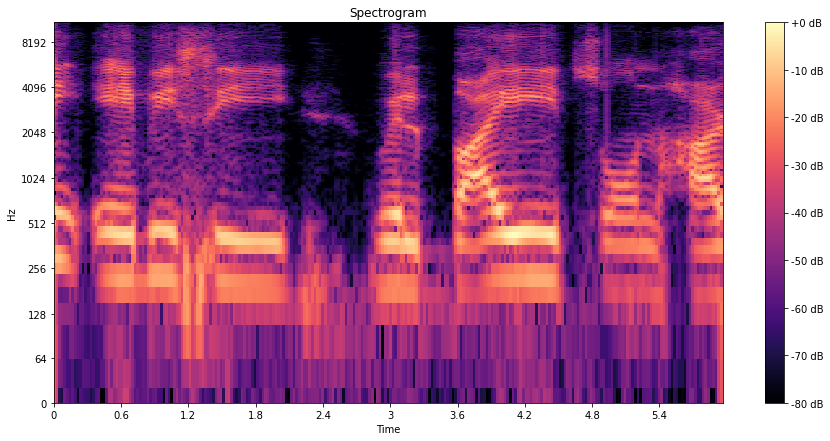

In [ ]:
X = np.load("/content/drive/MyDrive/synestheticAI/mel_spec_dataset/train_images.npy")
plt.figure(figsize = (15,7))
librosa.display.specshow(X[100],  x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');
del X

In [ ]:
np.unique(labels,return_counts = True)

(array([ 0, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([65, 82, 85, 60, 63, 50, 53, 44, 69, 45]))

In [ ]:
labels = labels%10

In [ ]:

np.save("/content/drive/MyDrive/synestheticAI/mel_spec_dataset/train_labels",
        labels)

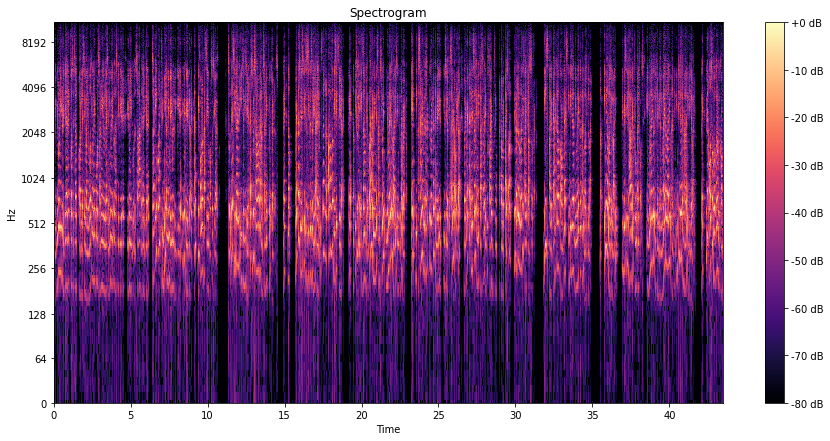

In [ ]:
plt.figure(figsize = (15,7))
librosa.display.specshow(img_spec_set[34],  x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

In [ ]:


############# 

img_spec_set = []
labels = []

for data in test_dataset:
    y = data['audio']['array']
    label = data['label']

    if len(y) < 958464: continue
    
    y = y[:2**15]

    spec = np.abs(librosa.stft(y, hop_length= 2**7, n_fft= 2**9,))
    spec = librosa.amplitude_to_db(spec, ref=np.max)

    img_spec_set.append(spec)
    labels.append(label)


img_spec_set = np.array(img_spec_set)
labels       = np.array(labels)


In [ ]:
np.unique(labels-1,return_counts = 1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([27, 35, 34, 24, 26, 21, 22, 17, 29, 19]))

In [ ]:
labels = labels - 1

In [ ]:
np.unique(labels,return_counts = 1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([27, 35, 34, 24, 26, 21, 22, 17, 29, 19]))

In [ ]:
np.save("/content/drive/MyDrive/synestheticAI/mel_spec_dataset/test_images",
        img_spec_set)

np.save("/content/drive/MyDrive/synestheticAI/mel_spec_dataset/test_labels",
        labels)

In [ ]:
np.unique(labels,return_counts = True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([27, 35, 34, 24, 26, 21, 22, 17, 29, 19]))

In [ ]:

np.save("/content/drive/MyDrive/synestheticAI/mel_spec_dataset/test_labels",
        labels)

In [ ]:
for data in dataloader_test:
    inputs,label = data
    Y  = [X['array'] for X in inputs]
    for y in Y:
        if len(y) < 958464: continue
        
        y = y[:958464]
        spec = np.abs(librosa.stft(y, hop_length=512))
        spec = librosa.amplitude_to_db(spec, ref=np.max)

        img_spec_set.append(spec)
        labels.append(label)

In [ ]:
del(train_dataset)
del(full_dataset)
del(test_dataset)

In [ ]:
img_spec_set = np.dstack(img_spec_set)
labels       = np.array(labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
aux = img_spec_set[0].shape
for i in img_spec_set:
  if i.shape != aux:
    print("MUDOU")


In [ ]:
labels.shape

(870,)

In [ ]:
np.save("/content/drive/MyDrive/synestheticAI/mel_spec_dataset",img_spec_set)
np.save("/content/drive/MyDrive/synestheticAI/labels",labels)